# Appendix
## Joseph Free
## Project 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Function definitions

In this section we define the functions used in the report. There are only two.

1. percentile: this function implements the percentile bootstrap method for the sample mean.
2. tbootstrap: this function implements the bootstrap-t method for the sample mean.

### 1.1 percentile

This function is used for calculating a bootstrap confidence interval for the sample mean using the percentile method. As inputs it takes in a one dimension array of data, the desired number of bootstrap samples, and the confidence level. Additionally, a verbose argument can be specified to return the array of bootstrap estimates and print out the calculated confidence interval.

The logic of the block is as follows:

1. Take $B$ bootstrap samples from the provided data.
2. For each sample, calculate $\hat{\theta}_b$, $b = 1, \ldots, n$
3. Order the $B$ bootstrap estimates from smallest to largest and find the $(1-\frac{\alpha}{2})$th and $\frac{\alpha}{2}$th percentiles: $\hat{\theta}_{(1-\frac{\alpha}{2})}$ and $\hat{\theta}_{\frac{\alpha}{2}}$.
4. The desired confidence interval is then $\big( \hat{\theta}_{\frac{\alpha}{2}} ,\hat{\theta}_{(1-\frac{\alpha}{2})} \big)$

In [2]:
def percentile(data, B, confidence_level, verbose = False):
    '''
    This function implements the percentile method for the sample mean. As inputs it 
    takes a 1D array of data, the number of bootstrap samples to take, and a 
    confidence level.
    '''
    
    sample_mean = np.mean(data)
    
    # Calculate level of significance
    level_sig = 1 - confidence_level
    
    # Initialize list for holding bootstrap estimates.
    bootstrap_estimates = []
    
    # Start the bootstrap.
    for i in range(0,B):
        # Resample observations with replacement. 
        bsample = np.random.choice(data, size = len(data), replace=True)
        # Append bootstrap estimate to the list.
        bootstrap_estimates.append(np.mean(bsample))
    
    # Order the bootstrap estimates
    bootstrap_estimates = np.sort(bootstrap_estimates)
    
    # Use order statistics to construct and return confidence interval. 
    lower_percentile = 0.5*level_sig
    lower_pos = int( np.ceil(B*lower_percentile) )
    lower = bootstrap_estimates[lower_pos]
    upper_percentile = 1-lower_percentile
    upper_pos = int( np.ceil(B*upper_percentile) )
    upper = bootstrap_estimates[upper_pos]
    
    # Return tuple representing CI
    # If verbose is false, just give CI
    if verbose == False:
        return (lower ,upper, bootstrap_estimates)
    
    # Otherwise print CI and return array of estimates.
    print(":::::PERCENTILE METHOD:::::")
    print("Sample mean: " + str(sample_mean))
    print("Bootstrap mean: " + str(np.mean(bootstrap_estimates)))
    print(str(confidence_level*100) + "% Confidence Interval:" + str( (lower,upper )) + "\n" )
    return (lower, upper, bootstrap_estimates)

### 1.2 bootstrapt

This function is used for calculating a bootstrap confidence interval for the sample mean using the bootstrap-t method. It takes the same inputs as the percentile function above and returns the array of bootstrap-t estimates and prints out the calculated confidence interval.

The logic of the block is as follows:

1. Calculate $\hat{\theta}$ and $s(\hat{\theta})$ based on original data. 
2. Take $B$ bootstrap samples from the provided data.
3. For each bootstrap sample, calculate and save

\begin{align*}
T^* & = \frac{\hat{\theta}^*(b) -\hat{\theta}}{s_{\hat{\theta}}(b)}, b = 1, \ldots, n
\end{align*}

4. Based on the collection of $T^*(b)$, $b = 1, \ldots, n$, find the $(1-\frac{\alpha}{2})$th and $\frac{\alpha}{2}$th upper percentiles $t^*_{1-\frac{\alpha}{2}}$, $t^*_{\frac{\alpha}{2}}$

5. The desired confidence intervals is then $\big( \hat{\theta} - s_{\hat{\theta}}t^*_{1-\frac{\alpha}{2}} , \hat{\theta} - s_{\hat{\theta}}t^*_{\frac{\alpha}{2}}  \big)$

In [3]:
def bootstrapt(data, B, confidence_level, verbose = False):
    '''
    This function implements the bootstrap-t for the sample mean. Structurally this implementation is similar
    to the percentile function above. It takes the same arguments: 1D array of data, number of bootstrap samples,
    and a verbose specifier for long output. It outputs the bootstrapped CI for the data.
    '''

    # Calculate level of significance
    level_sig = 1 - confidence_level
    
    # Initialize list for holding studentized bootstrap estimates and means.
    bootstrap_estimates = []
    bootstrap_means = []

    # Find estimates based on original sample.
    sample_mean = np.mean(data)
    std_err = np.std(data, ddof = 1) / np.sqrt(len(data))
    
    # Generate B bootstrap samples.
    for i in range(0,B):
        # Resample observations with replacement. 
        bsample = np.random.choice(data, size = len(data), replace=True)
        # Calculate sample mean and standard error
        strap_mean = np.mean(bsample)
        strap_err = np.std(bsample, ddof = 1) / np.sqrt(len(bsample))
        # Calculate studentized T* and append to the list.
        T = (strap_mean - sample_mean) / strap_err
        bootstrap_estimates.append(T)
        bootstrap_means.append(strap_mean)
        
    # Based on the studentized bootstrap estimates, find upper and lower percentiles.
    bootstrap_estimates = np.sort(bootstrap_estimates)
    
    lower_percentile = 0.5*level_sig
    lower_pos = int( np.ceil(B*lower_percentile) )
    lowerT = bootstrap_estimates[lower_pos]
    upper_percentile = 1-lower_percentile
    upper_pos = int( np.ceil(B*upper_percentile) )
    upperT = bootstrap_estimates[upper_pos]
    
    # Calculate and return confidence interval
    upper = sample_mean - std_err*lowerT
    lower = sample_mean - std_err*upperT
    
    # If verbose is false, just give interval.
    if verbose == False:
        return (lower, upper, bootstrap_estimates, bootstrap_means)
    
    # Otherwise print interval and return array of estimates.
    print(":::::bootstrap-t METHOD:::::")
    print("Sample mean: " + str(sample_mean))
    print("Bootstrap T* mean: " + str( np.mean(bootstrap_estimates) ) )
    print( "Bootstrap mean: " + str(np.mean(bootstrap_means) ) )
    print(str(confidence_level*100) + "% Confidence Interval:" + str( (lower,upper ) ))
    return (lower, upper, bootstrap_estimates, bootstrap_means)

## 2. Application 

Here we implement the two functions written above and compare their output. Particularly, for both the percentile method and bootstrap-t we generate $B = 500$ bootstrap samples and use them to construct estimated $90\%$ confidence intervals. The results of each method are printed out and then a plot of the bootstrapped parameter distribution.

### 2.1 Identical Bootstrap Samples

We consider the percentile and bootstrap-t methods on identical bootstrap samples and consider the differences between the estimated confidence intervals.

:::::PERCENTILE METHOD:::::
Sample mean: 27.6
Bootstrap mean: 27.73226666666667
90.0% Confidence Interval:(21.333333333333332, 34.93333333333333)

:::::bootstrap-t METHOD:::::
Sample mean: 27.6
Bootstrap T* mean: -0.32391126642899754
Bootstrap mean: 27.732266666666664
90.0% Confidence Interval:(21.5825027586785, 41.39293990015585)


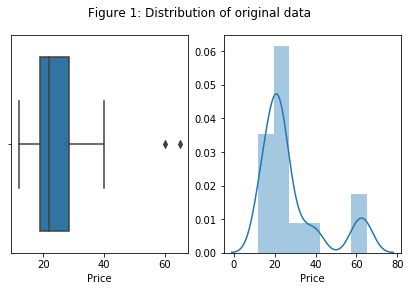

In [4]:
# Set a seed to replicate results
np.random.seed(829)

# Define the data set.
haircut_prices = np.array([65,32,12,20,60,14,16,21,20,18,40,24,22,25,25])
sample_mean = np.mean(haircut_prices)

# Calculate results from the percentile method.
result1 = percentile(haircut_prices, 500, .9, verbose = True)
result11 = result1[2]

# Reset seed to regenerate the same bootstrap samples.
np.random.seed(829)

# Calculate results from bootstrap-t method
result2 = bootstrapt(haircut_prices, 500, .9, verbose = True)
result21 = result2[2]
result22 = result2[3]

# Plot data.
fig = plt.figure(figsize=(7,4))
fig.suptitle("Figure 1: Distribution of original data")
ax = fig.add_subplot(1,2,1)
sns.boxplot(haircut_prices, ax=ax)
ax.set_xlabel("Price")
ax = fig.add_subplot(1,2,2)
sns.distplot(haircut_prices, ax=ax);
ax.set_xlabel("Price")
plt.savefig('project 2/fig1.png', format = 'png')

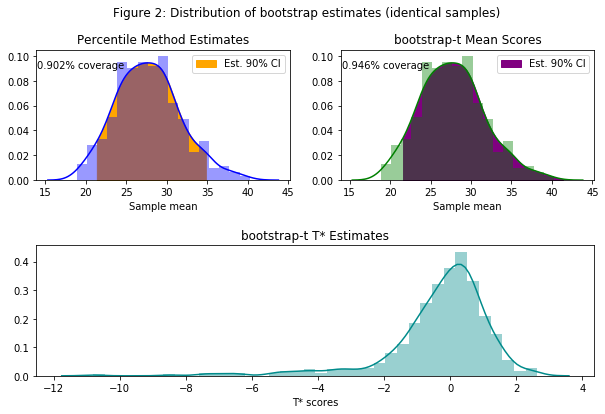

In [5]:
# Plot distribution of bootstrap estimates.
fig = plt.figure(figsize=(10,6))
fig.suptitle("Figure 2: Distribution of bootstrap estimates (identical samples)")
ax = fig.add_subplot(221)
# Percentile
sns.distplot(result11, color = 'blue' ,ax=ax)
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, 
                where = (kde_x >= result1[0]) & (kde_x <= result1[1]),
                color='orange',
                alpha = 1)
ax.set_title("Percentile Method Estimates")
ax.set_xlabel("Sample mean")
ax.legend(['Est. 90% CI'])
coverage = sum((result11 >= result1[0]) & (result11 <= result1[1]))
ax.text(14,.09, str(coverage/500)+"% coverage")

# bootstrap-t T* Scores
ax = fig.add_subplot(212)
sns.distplot(result21, color = 'darkcyan' ,ax=ax)
ax.set_title("bootstrap-t T* Estimates");
ax.set_xlabel("T* scores")

# bootstrap-t raw
ax = fig.add_subplot(222)
sns.distplot(result22, color = 'green' ,ax=ax)
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, 
                where = (kde_x>=result2[0]) & (kde_x<=result2[1]),
                color='purple',
                alpha = 1)
ax.set_title("bootstrap-t Mean Scores");
ax.set_xlabel("Sample mean")
fig.subplots_adjust( hspace = 0.5  )
ax.legend(['Est. 90% CI']);
coverage = sum((result22 >= result2[0]) & (result22 <= result2[1]))
ax.text(14,.09, str(coverage/500)+"% coverage");
plt.savefig('project 2/fig2.png', format = 'png')

### 2.1.1 Expectation

Given that the sample statistic of interest is $\bar{x}$, we can make some practical comparisons between the bootstrap results and the expected theoretical results for the original sample. In particular, we know that $\bar{x} \mathrel{\dot\sim} N(\mu,\frac{\sigma^2}{n})$ for "large" samples  and the typical 90% confidence interval is of the form $\bar{x} \pm 1.645\frac{s}{\sqrt{n}}$. For smaller samples with $\sigma$ unknown, we use the $t$ distribution with $n-1$ of freedom, and our confidence interval becomes $\bar{x} \pm t_{n-1, \frac{\alpha}{2}}\frac{s}{\sqrt{n}}$. Thus, we consider the differences between the bootstrapped CIs above and their theoretical equivalents.

In [6]:
# Expected CI from large sample theory
# This is from a Z table, not t. That part comes next.
crit_value = 1.645
stderr = np.std(haircut_prices, ddof = 1) / np.sqrt(len(haircut_prices))
lowerN = np.mean(haircut_prices) - crit_value*stderr
upperN = np.mean(haircut_prices) + crit_value*stderr
print(":::::LARGE SAMPLE CI:::::")
print("Sample mean: " + str(np.mean(haircut_prices)))
print("90% Confidence Interval:" + str( (lowerN,upperN) ))


#Expected CI with t-critical value.
# This is from a t-table with 14 df
crit_value = 1.761
lowert = np.mean(haircut_prices) - crit_value*stderr
uppert = np.mean(haircut_prices) + crit_value*stderr
print("\n:::::STUDENT'S t SAMPLE CI:::::")
print("Sample mean: " + str(np.mean(haircut_prices)))
print("90% Confidence Interval:" + str( (lowert,uppert) ))

:::::LARGE SAMPLE CI:::::
Sample mean: 27.6
90% Confidence Interval:(20.89045848560922, 34.30954151439078)

:::::STUDENT'S t SAMPLE CI:::::
Sample mean: 27.6
90% Confidence Interval:(20.417323643257042, 34.78267635674296)


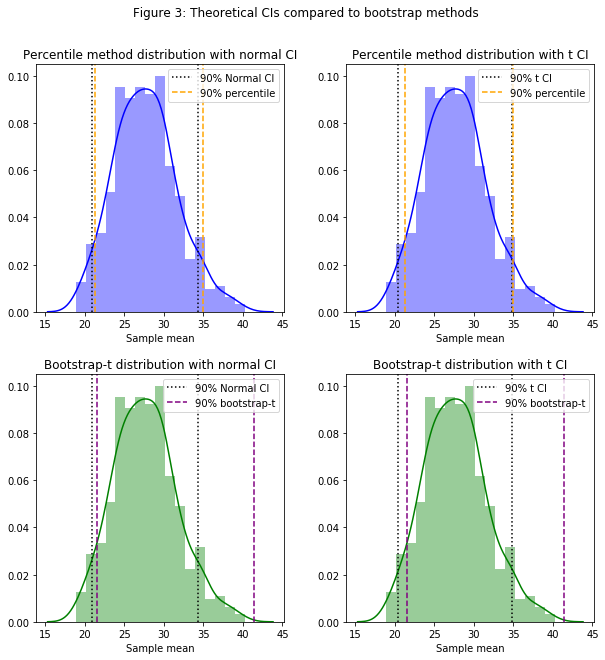

In [7]:
# Plot distribution of theoretical CIs.
fig = plt.figure(figsize=(10,10))
fig.suptitle("Figure 3: Theoretical CIs compared to bootstrap methods")
ax = fig.add_subplot(221)
# Percentile Method Comparison
sns.distplot(result11, color = 'blue' ,ax=ax)
ax.axvline(lowerN, ls =':', color = 'black')
ax.axvline(result1[0], ls ='--', color = 'orange')
ax.legend(['90% Normal CI','90% percentile'])
ax.axvline(upperN, ls = ':', color = 'black')
ax.axvline(result1[1], ls = '--', color = 'orange')

ax.set_title("Percentile method distribution with normal CI")
ax.set_xlabel("Sample mean")
ax = fig.add_subplot(222)
sns.distplot(result11, color = 'blue' ,ax=ax)
ax.axvline(lowert, ls =':', color = 'black')
ax.axvline(result1[0], ls ='--', color = 'orange')
ax.legend(['90% t CI','90% percentile'])
ax.axvline(uppert, ls = ':', color = 'black')
ax.axvline(result1[1], ls = '--', color = 'orange')
ax.set_title("Percentile method distribution with t CI");
ax.set_xlabel("Sample mean")
fig.subplots_adjust( hspace = 0.5  )

# Bootstrap t with normal CI
ax = fig.add_subplot(223)
sns.distplot(result22, color = 'green' ,ax=ax)
ax.axvline(lowerN, ls =':', color = 'black')
ax.axvline(result2[0], ls ='--', color = 'purple')
ax.legend(['90% Normal CI','90% bootstrap-t'])
ax.axvline(upperN, ls = ':', color = 'black')
ax.axvline(result2[1], ls = '--', color = 'purple')
ax.set_title("Bootstrap-t distribution with normal CI")
ax.set_xlabel("Sample mean")

# bootstrap t with t CI
ax = fig.add_subplot(224)
sns.distplot(result22, color = 'green' ,ax=ax)
ax.axvline(lowert, ls =':', color = 'black')
ax.axvline(result2[0], ls ='--', color = 'purple')
ax.legend(['90% t CI','90% bootstrap-t'])
ax.axvline(uppert, ls = ':', color = 'black')
ax.axvline(result2[1], ls = '--', color = 'purple')

ax.set_title("Bootstrap-t distribution with t CI");
ax.set_xlabel("Sample mean")
fig.subplots_adjust( hspace = 0.5  )
plt.subplots_adjust(top = .9, hspace=.25, wspace = 0.25);
plt.savefig('project 2/fig3.png', format = 'png')

## 2.2 Varying Bootstrap Sample Sizes

Here we investigate the two bootstrap methods subject to $B = 50, 250, 500, 1000, 10000$.

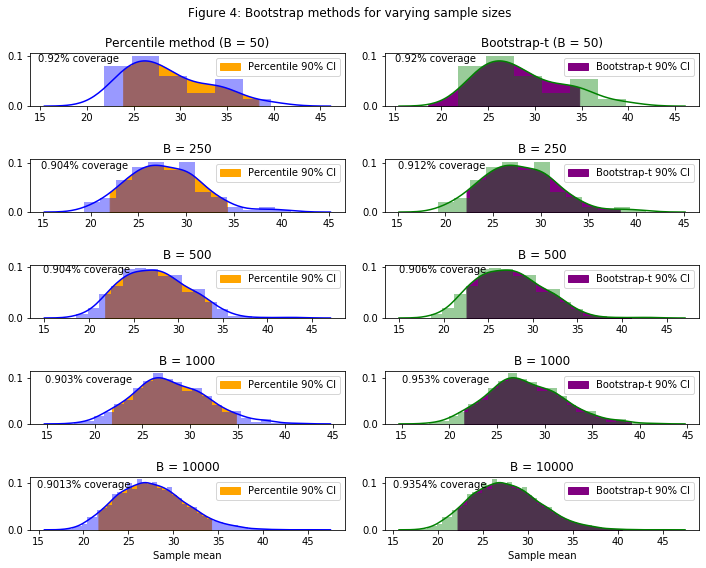

In [8]:
# Initialize list of bootstrap sample sizes and labels for each method..
Bs = [50,250,500,1000,10000]
labels1 = {50:"Percentile method (B = 50)", 250:"B = 250", 500:"B = 500", 1000:"B = 1000", 10000:"B = 10000" }
labels2 = {50:"Bootstrap-t (B = 50)",250:"B = 250", 500:"B = 500", 1000:"B = 1000", 10000:"B = 10000" }

# Initialize image control variable.
image = 1

# Start plotting figure. 
fig = plt.figure(figsize=(10,8))
fig.suptitle("Figure 4: Bootstrap methods for varying sample sizes")
for i in Bs:
    # set seed
    np.random.seed(i)
    
    # Calculate results from the percentile method.
    result1 = percentile(haircut_prices, i, .9)
    result11 = result1[2]

    # Reset seed to regenerate the same bootstrap samples.
    np.random.seed(i)

    # Calculate results from bootstrap-t method
    result2 = bootstrapt(haircut_prices, i, .9)
    result21 = result2[2]
    result22 = result2[3]
    

    ax = fig.add_subplot(5,2,image)
    # Percentile Method Comparison
    sns.distplot(result11, color = 'blue' ,ax=ax)
    kde_x, kde_y = ax.lines[0].get_data()
    ax.fill_between(kde_x, kde_y, 
                where = (kde_x >= result1[0]) & (kde_x <= result1[1]),
                color='orange',
                alpha = 1)
    ax.set_title( labels1[i] )
    if image == 9:
        ax.set_xlabel("Sample mean")
    ax.legend(['Percentile 90% CI'])
    coverage = sum((result11 >= result1[0]) & (result11 <= result1[1]))
    ax.text(14.8,.089, str(coverage/i)+"% coverage")

# bootstrap-t raw
    ax = fig.add_subplot(5,2,image+1)
    sns.distplot(result22, color = 'green' ,ax=ax)
    kde_x, kde_y = ax.lines[0].get_data()
    ax.fill_between(kde_x, kde_y, 
                where = (kde_x >= result2[0]) & (kde_x <= result2[1]),
                color='purple',
                alpha = 1)
    ax.set_title(labels2[i]);
    if image == 9:
        ax.set_xlabel("Sample mean")
    ax.legend(['Bootstrap-t 90% CI']);
    coverage = sum((result22 >= result2[0]) & (result22 <= result2[1]))
    ax.text(15,.089, str(coverage/i)+"% coverage")
    
    image = image + 2

fig.tight_layout()
fig.subplots_adjust( hspace = 1, top = 0.9 )
plt.savefig('project 2/fig4.png', format = 'png')

## 3. Transformation

In this section we consider a variance stabilizing transformation, namely $y = ln(\cdot)$, and examine the behavior of the bootstrapped intervals under transformation. Note the motivation for this approach is from observing outliers in the data.

Note: The percentile method is actually transformation-respecting _with respect to the replicate distribution_. Here we have transformed the original distribution of 15 data points, so we can not expect for the inverse-transformed percentile interval to agree with the untransformed percentile interval.

In [9]:
# Transform data
log_price = np.log((haircut_prices))

# Rerun the original analysis on transformed data.
# Set seed
np.random.seed(829)
# Calculate results from the percentile method.
result1 = percentile(log_price, 500, .9, verbose = True)
np.random.seed(829)
original1 = percentile(haircut_prices, 500, .9)[2]
lowerp = np.exp(result1[0])
upperp = np.exp(result1[1])
print("::::: TRANSFORMED PERCENTILE:::::")
print("90% Confidence Interval: (" + str(lowerp)+', '+str(upperp)+')\n')

# Reset seed to regenerate the same bootstrap samples.
np.random.seed(829)

# Calculate results from bootstrap-t method
result2 = bootstrapt(log_price, 500, .9, verbose = True)
np.random.seed(829)
original2 = bootstrapt(haircut_prices, 500, .9)[3]
lowerT = np.exp(result2[0])
upperT = np.exp(result2[1])
print("\n::::: TRANSFORMED BOOTSTRAPPED-T:::::")
print("90% Confidence Interval: (" + str(lowerT)+', '+str(upperT)+')\n')
result21 = result2[2]
result22 = result2[3]

:::::PERCENTILE METHOD:::::
Sample mean: 3.196873771122978
Bootstrap mean: 3.2008689681434244
90.0% Confidence Interval:(3.0014219929320256, 3.4144092226701925)

::::: TRANSFORMED PERCENTILE:::::
90% Confidence Interval: (20.11411873147688, 30.39898509038555)

:::::bootstrap-t METHOD:::::
Sample mean: 3.196873771122978
Bootstrap T* mean: -0.10355657772335661
Bootstrap mean: 3.200868968143425
90.0% Confidence Interval:(2.996197955757671, 3.4776020037028665)

::::: TRANSFORMED BOOTSTRAPPED-T:::::
90% Confidence Interval: (20.009315813009408, 32.38197703593416)



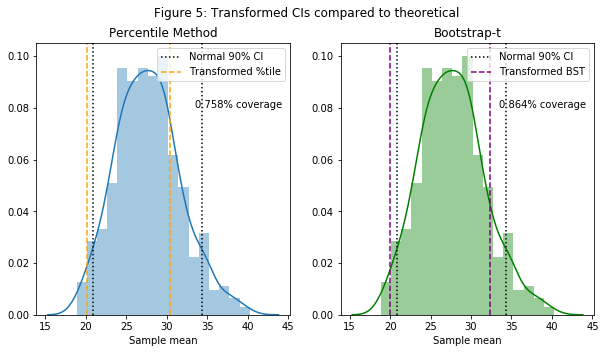

In [10]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("Figure 5: Transformed CIs compared to theoretical")
ax = fig.add_subplot(1,2,1)

# Plot original distribution with approx. CI and transformed CI
# Percentile
sns.distplot(original1)
ax.set_title("Percentile Method")
ax.axvline(lowerN, ls =':', color = 'black')
ax.axvline(lowerp, ls ='--', color = 'orange')
ax.legend(['Normal 90% CI', 'Transformed %tile'])
ax.axvline(upperN, ls =':', color = 'black')
ax.axvline(upperp, ls ='--', color = 'orange')
ax.set_xlabel("Sample mean")
coverage = sum((original1 >= lowerp) & (original1 <= upperp))
ax.text(33.5,.08, str(coverage/500)+"% coverage")

# Bootstrap t
ax = fig.add_subplot(1,2,2)
ax.set_title("Bootstrap-t")
sns.distplot(original2, color = 'green')
ax.axvline(lowerN, ls =':', color = 'black')
ax.axvline(lowerT, ls ='--', color = 'purple')
ax.legend(['Normal 90% CI', 'Transformed BST'])
ax.axvline(upperN, ls =':', color = 'black')
ax.axvline(upperT, ls ='--', color = 'purple')
ax.set_xlabel("Sample mean");
coverage = sum((original2 >= lowerT) & (original2 <= upperT))
ax.text(33.5,.08, str(coverage/500)+"% coverage");
plt.savefig('project 2/fig5.png', format = 'png')